In [ ]:
#| hide
from gene_finder.core import retrieve_and_save_sequence
import matplotlib.pyplot as plt
import biotite.sequence.graphics as graphics
import biotite.sequence.io.fasta as fasta

# gene_finder
> Utility to identify gene sequences from WGS data

## Quick Gene Assembly and Annotation Pipeline

- We have several short-read WGS sequencing datasets from our mode of action studies. 
Sometimes we need to retrieve the full length of a coding sequence when it's not 
well-annotated in public databases.
- We can leverage **SPAdes** for de novo assembly 
and **MMseqs2** for rapid gene finding to quickly identify and extract complete 
gene sequences from our sequencing data.

### Installation

First, install the required tools using conda:
```bash
conda install -c conda-forge -c bioconda mmseqs2 spades
```

In [ ]:
# our sequence libraries
!ls /Users/mtinti/git_projects/gene_finder/data/*q.gz

/Users/mtinti/git_projects/gene_finder/data/V350230622_L01_B5GANIdzjaRAAAA-1_R1.fastq.gz
/Users/mtinti/git_projects/gene_finder/data/V350230622_L01_B5GANIdzjaRAAAA-1_R2.fastq.gz
/Users/mtinti/git_projects/gene_finder/data/V350370689_L02_B5GANIokjbRAAAA-128_1.fq.gz
/Users/mtinti/git_projects/gene_finder/data/V350370689_L02_B5GANIokjbRAAAA-128_2.fq.gz
/Users/mtinti/git_projects/gene_finder/data/V350370689_L03_B5GANIokjbRAAAA-128_1.fq.gz
/Users/mtinti/git_projects/gene_finder/data/V350370689_L03_B5GANIokjbRAAAA-128_2.fq.gz


### Running Spades

This is the most time comsing part, this dataset run for 1h approx
```bash
spades.py -t 100 \
--pe1-1 ../data/V350230622_L01_B5GANIdzjaRAAAA-1_R1.fastq.gz \
--pe1-2 ../data/V350230622_L01_B5GANIdzjaRAAAA-1_R2.fastq.gz \
--pe2-1 ../data/V350370689_L02_B5GANIokjbRAAAA-128_1.fq.gz \
--pe2-2 ../data/V350370689_L02_B5GANIokjbRAAAA-128_2.fq.gz \
--pe3-1 ../data/V350370689_L03_B5GANIokjbRAAAA-128_1.fq.gz \
--pe3-2 ../data/V350370689_L03_B5GANIokjbRAAAA-128_2.fq.gz \
-o ../data/output_Tc_Sylvio
```

### Running mmseq2
Now we use mmseq2 to look for our gene on interest in the assebled scaffolds
```bash
!mmseqs easy-search --search-type 3 \
--format-output  query,evalue,qstart,qend,qlen,target,tstart,tend,tlen \
../data/CLK1_CDS_Dm28c.fa ../data/output_Tc_Sylvio/scaffolds.fasta \
../data/out.CLK1.tsv ../data/tmp
```

In [ ]:
#peek into the output
!head ../data/out.CLK1.tsv

CLK1	0.000E+00	369	1458	1458	NODE_2457_length_1097_cov_126.120588	1	1090	1097
CLK1	2.871E-225	1	445	1458	NODE_289_length_20803_cov_57.477757	20359	20803	20803
CLK1	1.021E-38	445	354	1458	NODE_2388_length_1130_cov_56.830959	1	92	1130
CLK1	1.716E-25	1389	1458	1458	NODE_1614_length_1713_cov_44.015892	1	70	1713
CLK1	1.716E-25	1389	1458	1458	NODE_55_length_75916_cov_61.009375	1	70	75916


- The CLK1 sequence is split into two contigs

NODE_2457 contains the second part of CLK1, NODE_289 contains the first part of CLK1. The two contigs do not permit to reconstruct the full sequence

### We can conclude that short read assembly can not assemble the full sequence of CLK1
let's grab anyway the two sequences

In [ ]:
retrieve_and_save_sequence('../data/output_Tc_Sylvio/scaffolds.fasta',
                           'NODE_2457_length_1097_cov_126.120588',
                           1,1090,'../data/out_NODE_2457.fa')

'Sequence saved to ../data/out_NODE_2457.fa'

In [ ]:
retrieve_and_save_sequence('../data/output_Tc_Sylvio/scaffolds.fasta',
                           'NODE_289_length_20803_cov_57.477757',
                           20359,20803,'../data/out_NODE_289.fa')

'Sequence saved to ../data/out_NODE_289.fa'

### Let's visualize the retived sequences along with the CLK1 sequence

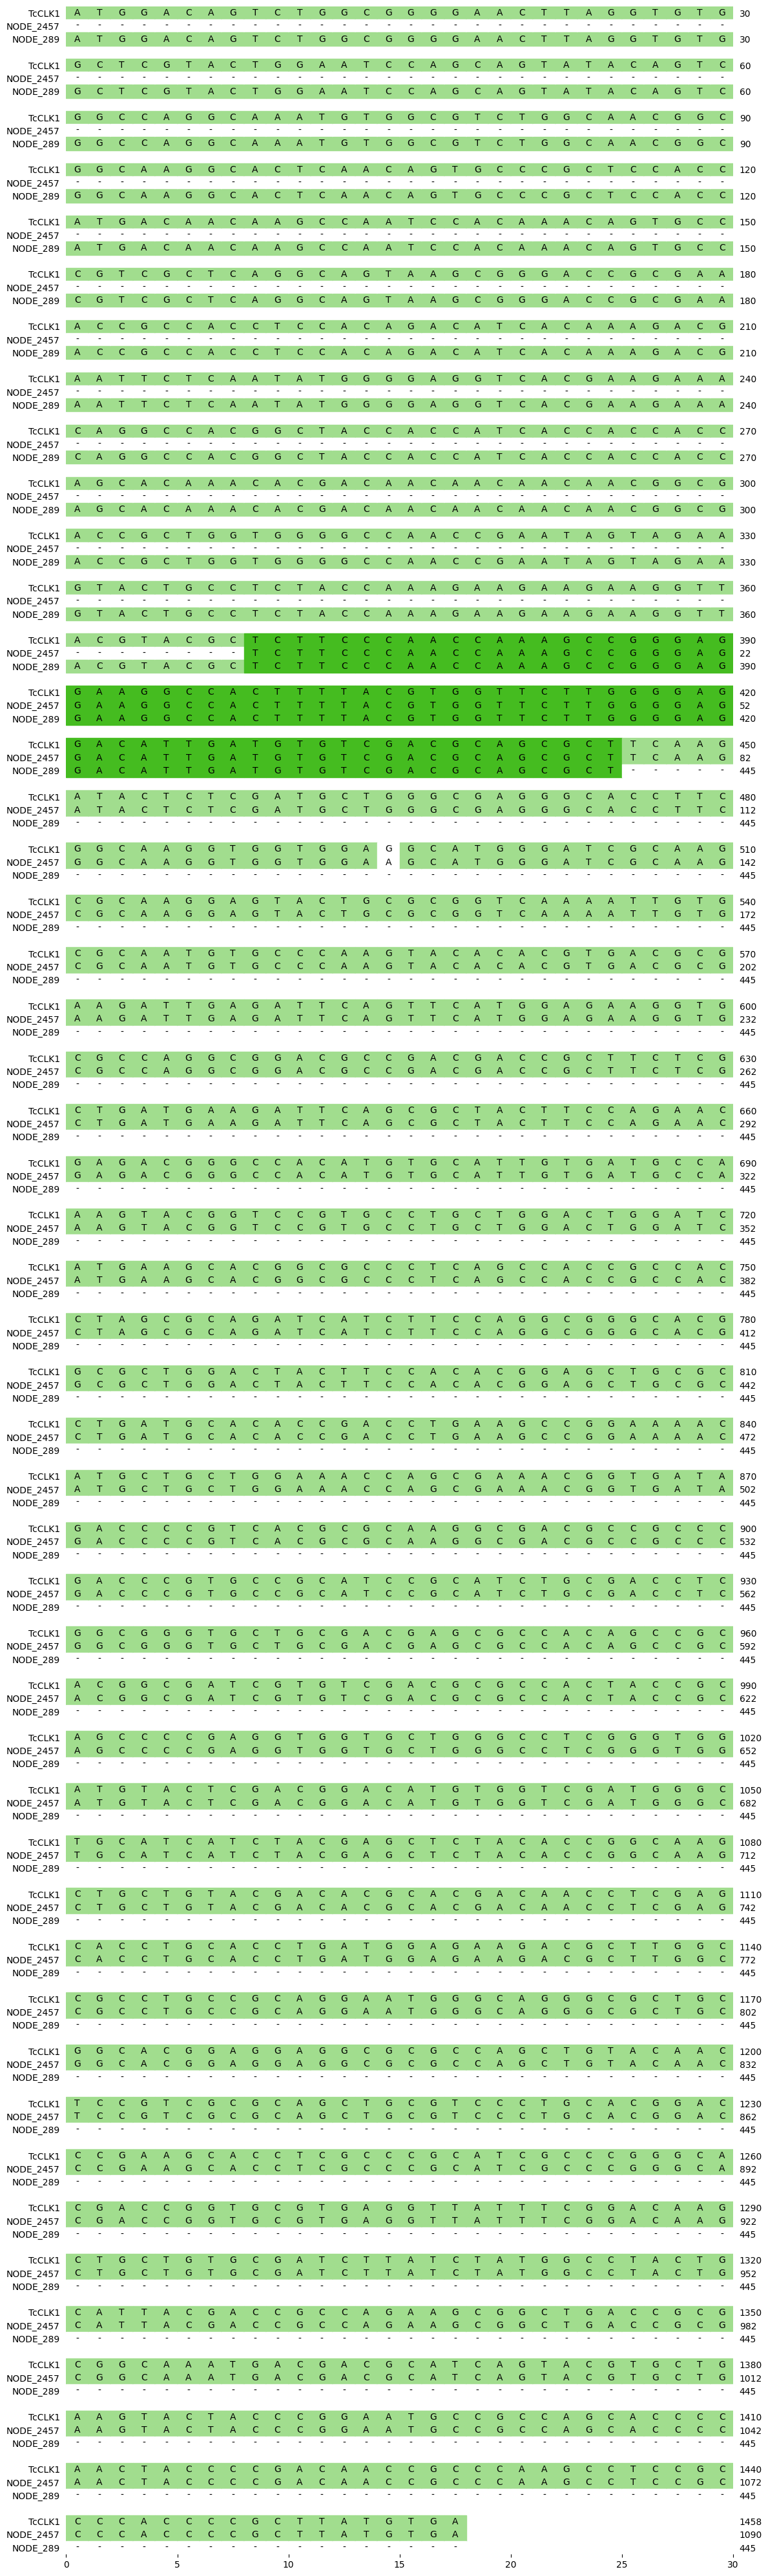

In [ ]:
import biotite.sequence as seq
import biotite.sequence.io.fasta as fasta
import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
import matplotlib.pyplot as plt

# Load sequences
sequences = []
labels = []
files = [
    '../data/TcCLK1_CM118357.1.fa',
    '../data/out_NODE_289.fa',
    '../data/out_NODE_2457.fa'
]

for file_path in files:
    fasta_file = fasta.FastaFile.read(file_path)
    for header, seq_string in fasta_file.items():
        sequences.append(seq.NucleotideSequence(seq_string))
        labels.append(header)

# Perform multiple sequence alignment
matrix = align.SubstitutionMatrix.std_nucleotide_matrix()
alignment, order, _, _ = align.align_multiple(sequences, matrix, gap_penalty=(-15, -2))

# Reorder to match your input order
alignment = alignment[:, [0, 2, 1]]

labels = ['TcCLK1','NODE_2457','NODE_289']
# Visualize
fig, ax = plt.subplots(figsize=(12, 40))
graphics.plot_alignment_similarity_based(
    ax, alignment, labels=labels, symbols_per_line=30,
    show_numbers=True,
    show_line_position=True,
)
plt.tight_layout()
plt.show()

### Comments
From our sequencing data it seems we have a synonymous mutation

## Developer Guide

If you are new to using `nbdev` here are some useful pointers to get you started.

### Install gene_finder in Development mode

```sh
# make sure gene_finder package is installed in development mode
$ pip install -e .

# make changes under nbs/ directory
# ...

# compile to have changes apply to gene_finder
$ nbdev_prepare
```

## Usage

### Installation

Install latest from the GitHub [repository][repo]:

```sh
$ pip install git+https://github.com/mtinti/gene_finder.git
```

or from [conda][conda]

```sh
$ conda install -c mtinti gene_finder
```

or from [pypi][pypi]


```sh
$ pip install gene_finder
```


[repo]: https://github.com/mtinti/gene_finder
[docs]: https://mtinti.github.io/gene_finder/
[pypi]: https://pypi.org/project/gene_finder/
[conda]: https://anaconda.org/mtinti/gene_finder

### Documentation

Documentation can be found hosted on this GitHub [repository][repo]'s [pages][docs]. Additionally you can find package manager specific guidelines on [conda][conda] and [pypi][pypi] respectively.

[repo]: https://github.com/mtinti/gene_finder
[docs]: https://mtinti.github.io/gene_finder/
[pypi]: https://pypi.org/project/gene_finder/
[conda]: https://anaconda.org/mtinti/gene_finder

## How to use

Fill me in please! Don't forget code examples:

In [ ]:
1+1

2